# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

In [540]:
#Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [541]:
#ваш код
data = pd.read_csv('data/Advertising.csv', index_col=0)
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [542]:
#ваш код 
print('Число пропусков:')
print(data.isnull().sum())

Число пропусков:
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


Пропусков нет, идём дальше.

In [543]:
#ваш код 

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [544]:
#ваш код
n = len(data)
#Так как эти массивы будут использоваться для разных 
# преобразований в разных заданиях, поставил для себя пометку _.
X_ = np.array(data[['TV', 'radio', 'newspaper']].values)
# До этого тут были строки, добавляющие свободный коэффициент
# в х и конвертирующие y. 
# Отредактировал Х, у оставил неизменным, надеюсь, это не 
# повлияет в дальнейшем.
y_ = np.array(data['sales'].values.reshape(n, 1))
#Для проверки
print(X_[0])
print(X_.shape, y_.shape)

[230.1  37.8  69.2]
(200, 3) (200, 1)


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [545]:
import numpy as np

X = np.hstack([np.ones(X_.shape[0]).reshape(-1, 1), X_])
y = y_.reshape(-1, 1)
#Проверка
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [546]:
X_norm = X / np.sqrt(np.sum(np.square(X), axis=0))
X_norm[:5]

array([[0.07071068, 0.09561706, 0.09692057, 0.13052034],
       [0.07071068, 0.01849178, 0.10076663, 0.08506456],
       [0.07071068, 0.00714739, 0.11768927, 0.13070895],
       [0.07071068, 0.06295517, 0.1058947 , 0.11033873],
       [0.07071068, 0.07513066, 0.02769159, 0.11015011]])

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [547]:
# ваш код
num_iters = 1000 #количество итераций
m = X_norm.shape[0] # количество строк в матрице X
n = X_norm.shape[1] # количество столбцов в матрице X
w = np.zeros((n, 1)) # вектор размера nx1, состояющий из нулей
w_dict = {}

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X_norm[:,0:k] @ w[0:k]) + (X_norm[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X_norm[:,k].T @ (y - h))
        w_dict.update({f'w{k}': w[k]})
    # Вычисляем функцию потерь для координатного спуска
    y_pred = X_norm @ w
    cost_CD = sum((y_pred - y) ** 2)/(len(y))

display(w_dict)
w_list = list(w_dict.values())
print(f'Функция ошибки (MSE) в последней итерации: {cost_CD}')

{'w0': array([41.56217205]),
 'w1': array([110.13144155]),
 'w2': array([73.52860638]),
 'w3': array([-0.55006384])}

Функция ошибки (MSE) в последней итерации: [2.78412631]


In [548]:
# Получившиеся коэффициенты
w_list

[array([41.56217205]),
 array([110.13144155]),
 array([73.52860638]),
 array([-0.55006384])]

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [549]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X_norm, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

P.S.
Совпадение идеально.

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [550]:
#ваш код
X_scal = (X_ - X_.mean(axis=0)) / X_.std(axis=0)
X_scal[:5]

array([[ 0.96985227,  0.98152247,  1.77894547],
       [-1.19737623,  1.08280781,  0.66957876],
       [-1.51615499,  1.52846331,  1.78354865],
       [ 0.05204968,  1.21785493,  1.28640506],
       [ 0.3941822 , -0.84161366,  1.28180188]])

**Добавим единичный столбец**

In [551]:
X_scal = np.hstack([np.ones(X_scal.shape[0]).reshape(-1, 1), X_scal])
display(X_scal[0])
X_scal.shape

array([1.        , 0.96985227, 0.98152247, 1.77894547])

(200, 4)

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [552]:
#ваш код
def mse_error(y, y_pred):
    return ((y_pred-y)**2).mean()

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [553]:
#ваш код
y_pred_list = []
for i in range(y_.shape[0]):
    y_pred = y_.mean()
    y_pred_list.append(y_pred)
y_pred_array = np.array(y_pred_list)
# Среднеквадратичная ошибка для наивного прогноза
cost_Naive = mse_error(y_, y_pred_array)
display(y_pred_array.reshape(-1, 1).shape)
print(f'Ошибка для проноза: {cost_Naive}')

(200, 1)

Ошибка для проноза: 27.08574375


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [554]:
#ваш код
def lin_pred(X, w_array):
    return X@w_array

#Проверю работу на нормализованных данных
y_lin_pred = lin_pred(X_norm, w_list)
mse_error(y_, y_lin_pred)

2.7841263145109365

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [555]:
#ваш код

#Функция реализации шага градиентного спуска
def stoch_grad_step(X, y, w, train_ind, temp):
    '''
    Параметры:
    X - матрица признаков
    y - вектор ответов
    w - вектор весов
    train_int - индекс объекта из обучающей выборки, 
    по которому счиатестя изменение весов
    temp - шаг градиентного спуска
    '''
    X_curr = X[train_ind].reshape(1, -1)
    y_curr = y[train_ind]
    direction = 2*X_curr.T@(X_curr@w - y_curr)
    w_new = w - temp*direction
    return w_new

stoch_grad_step(X_scal, y_, w=np.zeros((n, 1)), train_ind=98, temp=0.1)

array([[5.08      ],
       [8.46223441],
       [6.52972275],
       [4.82789394]])

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [556]:
# ваш код

def stochastic_gradient_descent(X, y, temp, max_iter, w=np.zeros((n, 1)), eu_dist=1e-5, info=None):
    """
    Параметры:
    X - матрица признаков (m, n)
    y - вектор целевых значений (m, 1)
    w - изначальная точка (веса модели) 
    temp - скорость обучения
    max_iter - количество эпох
    eu_dist - евклидово расстояние между векторами весов на 
    соседних итерациях градиентного спуска, при котором алгоритм 
    прекращает работу
    info - Включить, если нужна краткая выкладка по работе функции 
    (Итоговые коэффициенты и ошибка, количество итераций)
    """
    v_dist = 1e+10
    costs = []
    iter = 0
    v_dist_list = []
    for i in range(max_iter):
        index = np.random.randint(0, m)
        y_pred = lin_pred(X, w_array=w)
        costs.append(mse_error(y, y_pred))
        w_new = stoch_grad_step(X, y, w, train_ind=index, temp=temp)
        v_dist = np.linalg.norm(w_new-w)
        v_dist_list.append(v_dist)
        w = w_new
        iter = 1+i
        if v_dist < eu_dist:
            print(f'Ранняя остановка на итерации {iter}: {v_dist:.6f} < {eu_dist}"')
            break
    if info != None:
        print(f'Итоговые коэффициенты: {w} \n MSE: {costs[-1]:.3f} \n Итераций: {iter}')
    return w, costs, iter, v_dist_list, eu_dist

w, costs, iter, v_dist_list, eu_dist = stochastic_gradient_descent(
    X_scal, 
    y_, 
    temp=0.003, 
    max_iter=10**5, 
    info='Да'
    )

Ранняя остановка на итерации 824: 0.000005 < 1e-05"
Итоговые коэффициенты: [[13.79346351]
 [ 3.9280698 ]
 [ 2.79391393]
 [ 0.05226868]] 
 MSE: 2.842 
 Итераций: 824


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

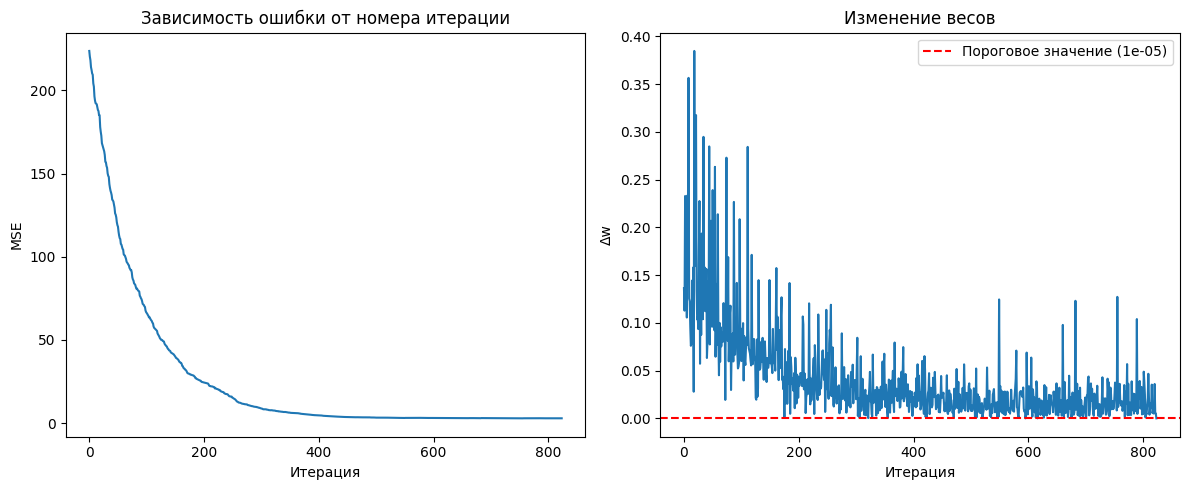

In [557]:
# ваш код
# График зависимости ошибки от номера итерации
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.title('Зависимость ошибки от номера итерации')

# Дополнительный график изменения длины вектора весов 
# в зависимости от заданного порога
plt.subplot(1, 2, 2)
plt.plot(v_dist_list)
plt.xlabel('Итерация')
plt.ylabel('Δw')
plt.title('Изменение весов')
plt.axhline(y=eu_dist, 
            color='r', 
            linestyle='--', 
            label=f'Пороговое значение ({eu_dist})'
            )
plt.legend()
plt.tight_layout()
plt.show()

Дополнительно прикрепил график изменения расстояния вектора весов.

**Выведите вектор весов, к которому сошелся метод.**

In [558]:
# ваш код
print(f'Веса, удовлетворяющие условию сходимости: \n {w}')

Веса, удовлетворяющие условию сходимости: 
 [[13.79346351]
 [ 3.9280698 ]
 [ 2.79391393]
 [ 0.05226868]]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [559]:
# ваш код
cost_SGD = costs[-1]
print(f'Итоговая среднеквадратичная ошибка: {cost_SGD}')

Итоговая среднеквадратичная ошибка: 2.8424372853980047


In [560]:
# Дополнительная ячейка для сравнения моделей
print('Среднеквадратичная ошибка наивного прогноза:', np.round(cost_Naive, 2))
print('Среднеквадратичная ошибка координатного спуска:', np.round(cost_CD, 2))
print('Среднеквадратичная ошибка SGD:', np.round(cost_SGD, 2))

Среднеквадратичная ошибка наивного прогноза: 27.09
Среднеквадратичная ошибка координатного спуска: [2.78]
Среднеквадратичная ошибка SGD: 2.84


# Пара выводов:
### Координатный спуск
Метод показывает неплохую точность, и реализуется несколько проще SGD. Но, отсюда подозреваю, что шанс переобучения у него больше.

### SGD
1. По сравнению с наивным методом, ошибка после использования градиентного спуска уменьшилась в среднем примерно в 10 раз.
2. К некоторым функциям прикрутил несколько дополнительных фишек (например, параметр info к основной функции sgd, так как возмножно буду использовать её для себя, а через этот параметр удобнее выводить информацию, чем через несколько строчек), надеюсь, это не повлияет на оценку (негативно).
3. Поэкспериментировал с параметром скорости обучения, в функции использовал наиболее оптимальный. Если он отличается более, чем на 0.002, количество итераций начинает в среднем расти.

В общем и целом ещё стоит отметить, что результат по методу координатного спуска воспроизводим, в отличие от SGD, так как последний каждый раз берет на вход признаки под случайным индексом. Эффективнее всех исходя из метрик работает Координатный спуск, но иногда, в зависимотси от сходимости, SGD бывает чуть лучше.

MAE по требованию с сайта не выводил, так как для этого придётся заметно переписать предложенный в примерах код, иначе как это сделать не придумал. Если уж нужен будет, напишите в отзыве.